<a href="https://colab.research.google.com/github/AndreaValenciaBorja/smartQuestion/blob/main/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>Flujo de analítica </h1>
<br>

*Tiempo aproximado:* ***15 minutos***

In [1]:
# Importamos las bibliotecas necesarias

# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para preprocesamiento
from sklearn.model_selection import train_test_split
# bibliotecas para modelado
from sklearn.ensemble import RandomForestClassifier

# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv(ruta_archivo)

In [3]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [4]:
# Visualizar las primeras filas del conjunto de datos

print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y


In [5]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())
#


Estadísticas descriptivas:
        ingresos_solicitante   ingresos_cosolicitante   monto_prestamo  \
count             614.000000               614.000000       592.000000   
mean             5403.459283              1621.245798       146.412162   
std              6109.041673              2926.248369        85.587325   
min               150.000000                 0.000000         9.000000   
25%              2877.500000                 0.000000       100.000000   
50%              3812.500000              1188.500000       128.000000   
75%              5795.000000              2297.250000       168.000000   
max             81000.000000             41667.000000       700.000000   

        plazo_prestamo   historial_crediticio  
count        600.00000             564.000000  
mean         342.00000               0.842199  
std           65.12041               0.364878  
min           12.00000               0.000000  
25%          360.00000               1.000000  
50%          360.

In [6]:
# Paso 3: Preprocesamiento de datos

# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [7]:
# mostramos nuevemamente la información general del dataset
# para verificar que no hayan nulos

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [8]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo"]]
y = data[' estado_prestamo']

In [9]:
# mostramos la información de las características
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    monto_prestamo          480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [10]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

 estado_prestamo
Y    332
N    148
Name: count, dtype: int64


In [11]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.61


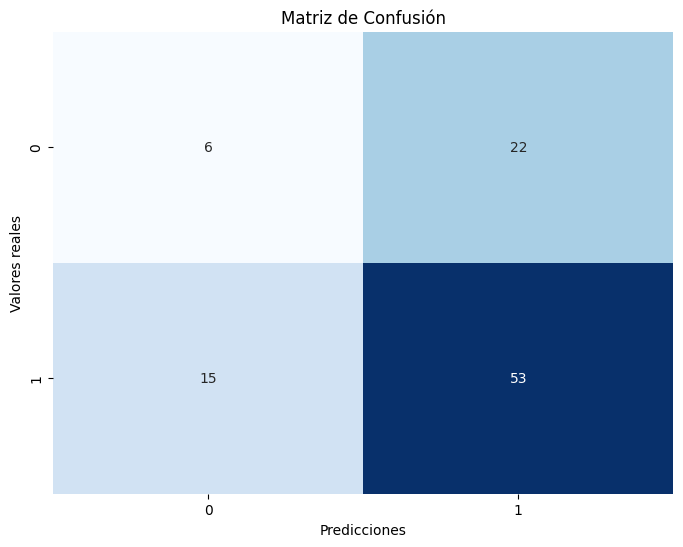


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.29      0.21      0.24        28
           Y       0.71      0.78      0.74        68

    accuracy                           0.61        96
   macro avg       0.50      0.50      0.49        96
weighted avg       0.58      0.61      0.60        96



In [13]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [14]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [15]:

# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' ingresos_solicitante': [5000],
    ' ingresos_cosolicitante': [0],
    ' monto_prestamo': [300]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.




Predicción: ['Y']


In [16]:
# Ejercicios a realizar:

# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo
# 2. Utliza otro algoritmo y compara los resultados los resultados




In [31]:
print(data.columns)

Index(['ID', 'Genero', 'Married', 'dependientes', ' educacion',
       ' autoempleado', ' ingresos_solicitante', ' ingresos_cosolicitante',
       ' monto_prestamo', ' plazo_prestamo', ' historial_crediticio',
       ' area_propiedad', ' estado_prestamo'],
      dtype='object')


In [33]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[" ingresos_solicitante", " monto_prestamo", " historial_crediticio"]]
y = data[' estado_prestamo']

In [34]:
# mostramos la información de las características
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    ingresos_solicitante  480 non-null    int64  
 1    monto_prestamo        480 non-null    float64
 2    historial_crediticio  480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [35]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

 estado_prestamo
1    332
0    148
Name: count, dtype: int64


In [36]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.71


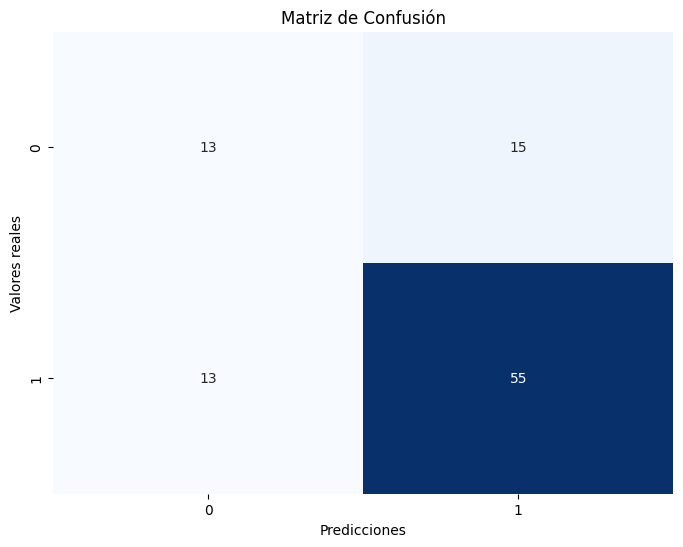


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        28
           1       0.79      0.81      0.80        68

    accuracy                           0.71        96
   macro avg       0.64      0.64      0.64        96
weighted avg       0.70      0.71      0.71        96



In [39]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [41]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Ajustar el modelo con los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor rendimiento
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor precisión en validación cruzada: 0.7813738892686262


In [42]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Ajustar y transformar el conjunto de entrenamiento
X_res, y_res = smote.fit_resample(X_train, y_train)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Crear y ajustar el modelo SVM
modelo_svm = SVC(kernel='linear', random_state=42)
modelo_svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_svm = modelo_svm.predict(X_test)

# Evaluar el modelo SVM
print("Precisión del modelo SVM:", accuracy_score(y_test, y_pred_svm))
print("Informe de clasificación del modelo SVM:")
print(classification_report(y_test, y_pred_svm))

Precisión del modelo SVM: 0.8229166666666666
Informe de clasificación del modelo SVM:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [44]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo usando validación cruzada
scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print("Precisión media con validación cruzada:", scores.mean())

Precisión media con validación cruzada: 0.76875
